In [1]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from matplotlib.animation import FuncAnimation
from matplotlib.widgets import Slider

from mpl_toolkits.mplot3d import Axes3D

from sklearn.datasets import make_regression

sns.set_theme()

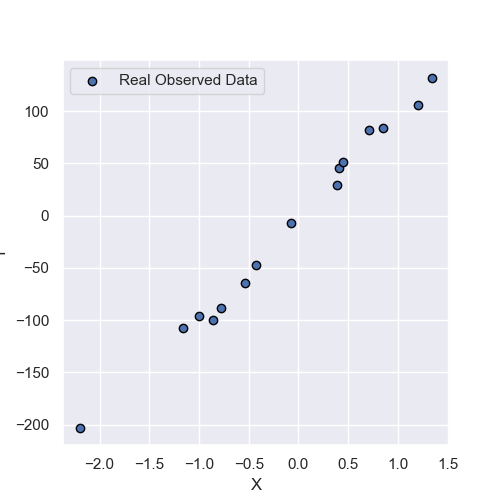

In [2]:
X, y = make_regression(n_samples=15, n_features=1, noise=15)
y = y.reshape(-1,1)

plt.figure(figsize=(5,5))
plt.scatter(X, y, label='Real Observed Data', edgecolors='black')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

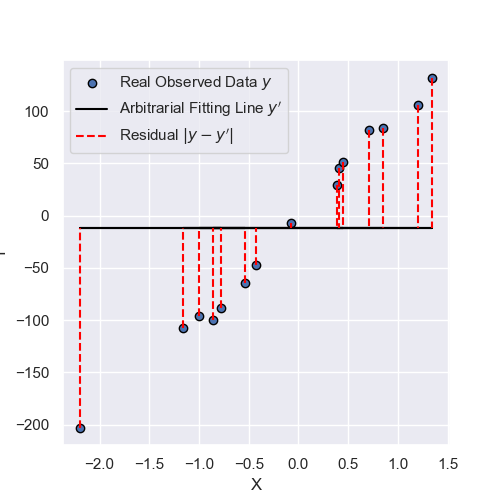

In [3]:
a = 0
b = np.mean(y)
y_ = a * X + b

plt.figure(figsize=(5,5))
plt.scatter(X, y, label='Real Observed Data $y$', ec='black')
plt.plot(X, y_, label="Arbitrarial Fitting Line $y'$", c='black')
plt.vlines(x=X, ymin=y, ymax=y_, color='red', ls='--', label="Residual $|y-y'|$")
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [4]:
def mse(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def dmse_da(x, y_true, y_pred):
    return -2 * np.mean(x * (y_true - y_pred))

def dmse_db(y_true, y_pred):
    return -2 * np.mean(y_true - y_pred)

Epoch: 0 | Loss: 20786.23068
Epoch: 1 | Loss: 14252.56065
Epoch: 2 | Loss: 9787.29128
Epoch: 3 | Loss: 6732.98645
Epoch: 4 | Loss: 4642.17311
Epoch: 5 | Loss: 3209.90862
Epoch: 6 | Loss: 2228.14703
Epoch: 7 | Loss: 1554.80435
Epoch: 8 | Loss: 1092.75486
Epoch: 9 | Loss: 775.54959
Epoch: 10 | Loss: 557.69272
Epoch: 11 | Loss: 408.01314
Epoch: 12 | Loss: 305.14107
Epoch: 13 | Loss: 234.41802
Epoch: 14 | Loss: 185.78407
Epoch: 15 | Loss: 152.33217
Epoch: 16 | Loss: 129.31806
Epoch: 17 | Loss: 113.48193
Epoch: 18 | Loss: 102.58315
Epoch: 19 | Loss: 95.08124
Epoch: 20 | Loss: 89.9168
Epoch: 21 | Loss: 86.36107
Epoch: 22 | Loss: 83.91269
Epoch: 23 | Loss: 82.22664
Epoch: 24 | Loss: 81.06546
Epoch: 25 | Loss: 80.2657
Epoch: 26 | Loss: 79.71482
Epoch: 27 | Loss: 79.33536
Epoch: 28 | Loss: 79.07396
Epoch: 29 | Loss: 78.89387
Epoch: 30 | Loss: 78.76981
Epoch: 31 | Loss: 78.68433
Epoch: 32 | Loss: 78.62544
Epoch: 33 | Loss: 78.58486
Epoch: 34 | Loss: 78.5569
Epoch: 35 | Loss: 78.53764
Epoch: 36 |

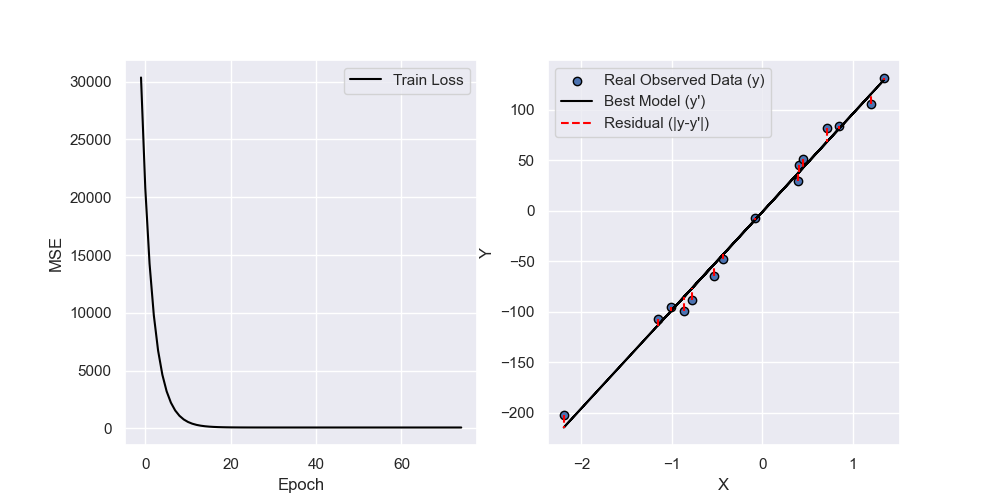

In [5]:
coef = []
loss = []

learning_rate = 1e-01
epochs = 75

a = 0
b = np.mean(y)

coef.append((a,b))
loss.append(mse(y, y_))

for i in range(0, epochs):

    da = dmse_da(X, y, y_)
    db = dmse_db(y, y_)

    a -= learning_rate * da
    b -= learning_rate * db

    y_ = a * X + b

    coef.append((a,b))
    loss.append(mse(y, y_))

    print(f'Epoch: {i} | Loss: {round(loss[-1], 5)}')

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

ax[0].plot(range(-1, epochs), loss, label="Train Loss", c='black')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('MSE')
ax[0].legend()

ax[1].scatter(X, y, label='Real Observed Data (y)', ec='black')
ax[1].plot(X, y_, label="Best Model (y')", c='black')
ax[1].vlines(x=X, ymin=y, ymax=y_, color='red', ls='--', label="Residual (|y-y'|)")
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend()

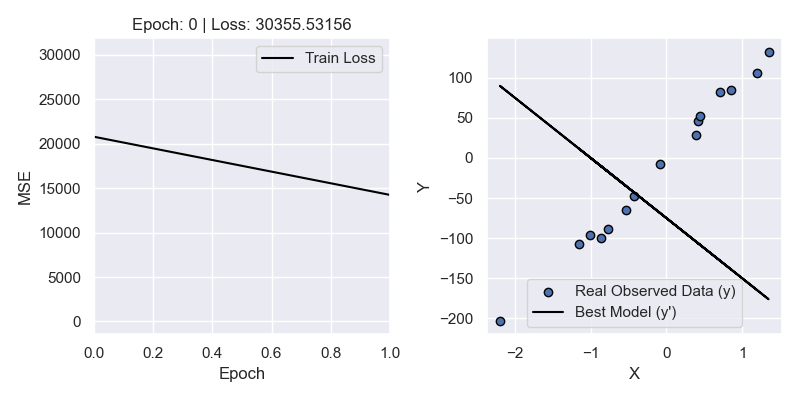

In [20]:
def animate(i):
    if i == 0:
        ax[0].set_xlim(0, 1)
    else:
        ax[0].set_xlim(0, i)
    ax[0].set_title(f'Epoch: {i} | Loss: {round(loss[i], 5)}')

    a = coef[i][0]
    b = coef[i][1]
    y_ = a * X + b

    line.set_ydata(y_)

y_ = coef[0][0] * X + coef[0][1]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))

ax[0].plot(range(-1, epochs), loss, label="Train Loss", c='black')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('MSE')
ax[0].set_title(f'Epoch: 0 | Loss: {round(loss[0], 5)}')
ax[0].set_xlim(0,1)
ax[0].legend()

ax[1].scatter(X, y, label='Real Observed Data (y)', ec='black')
line, = ax[1].plot(X, y_, label="Best Model (y')", c='black')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].legend()

fig.tight_layout()

FuncAnimation(fig, animate, frames=epochs, repeat=False)